In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("C:/Users/USER/Downloads/Admission_Prediction.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data['GRE Score'].median()

317.0

In [8]:
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].median())

In [9]:
data['TOEFL Score'].median()

107.0

In [10]:
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].median())

In [11]:
data['University Rating'].median()

3.0

In [12]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].median())

In [13]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

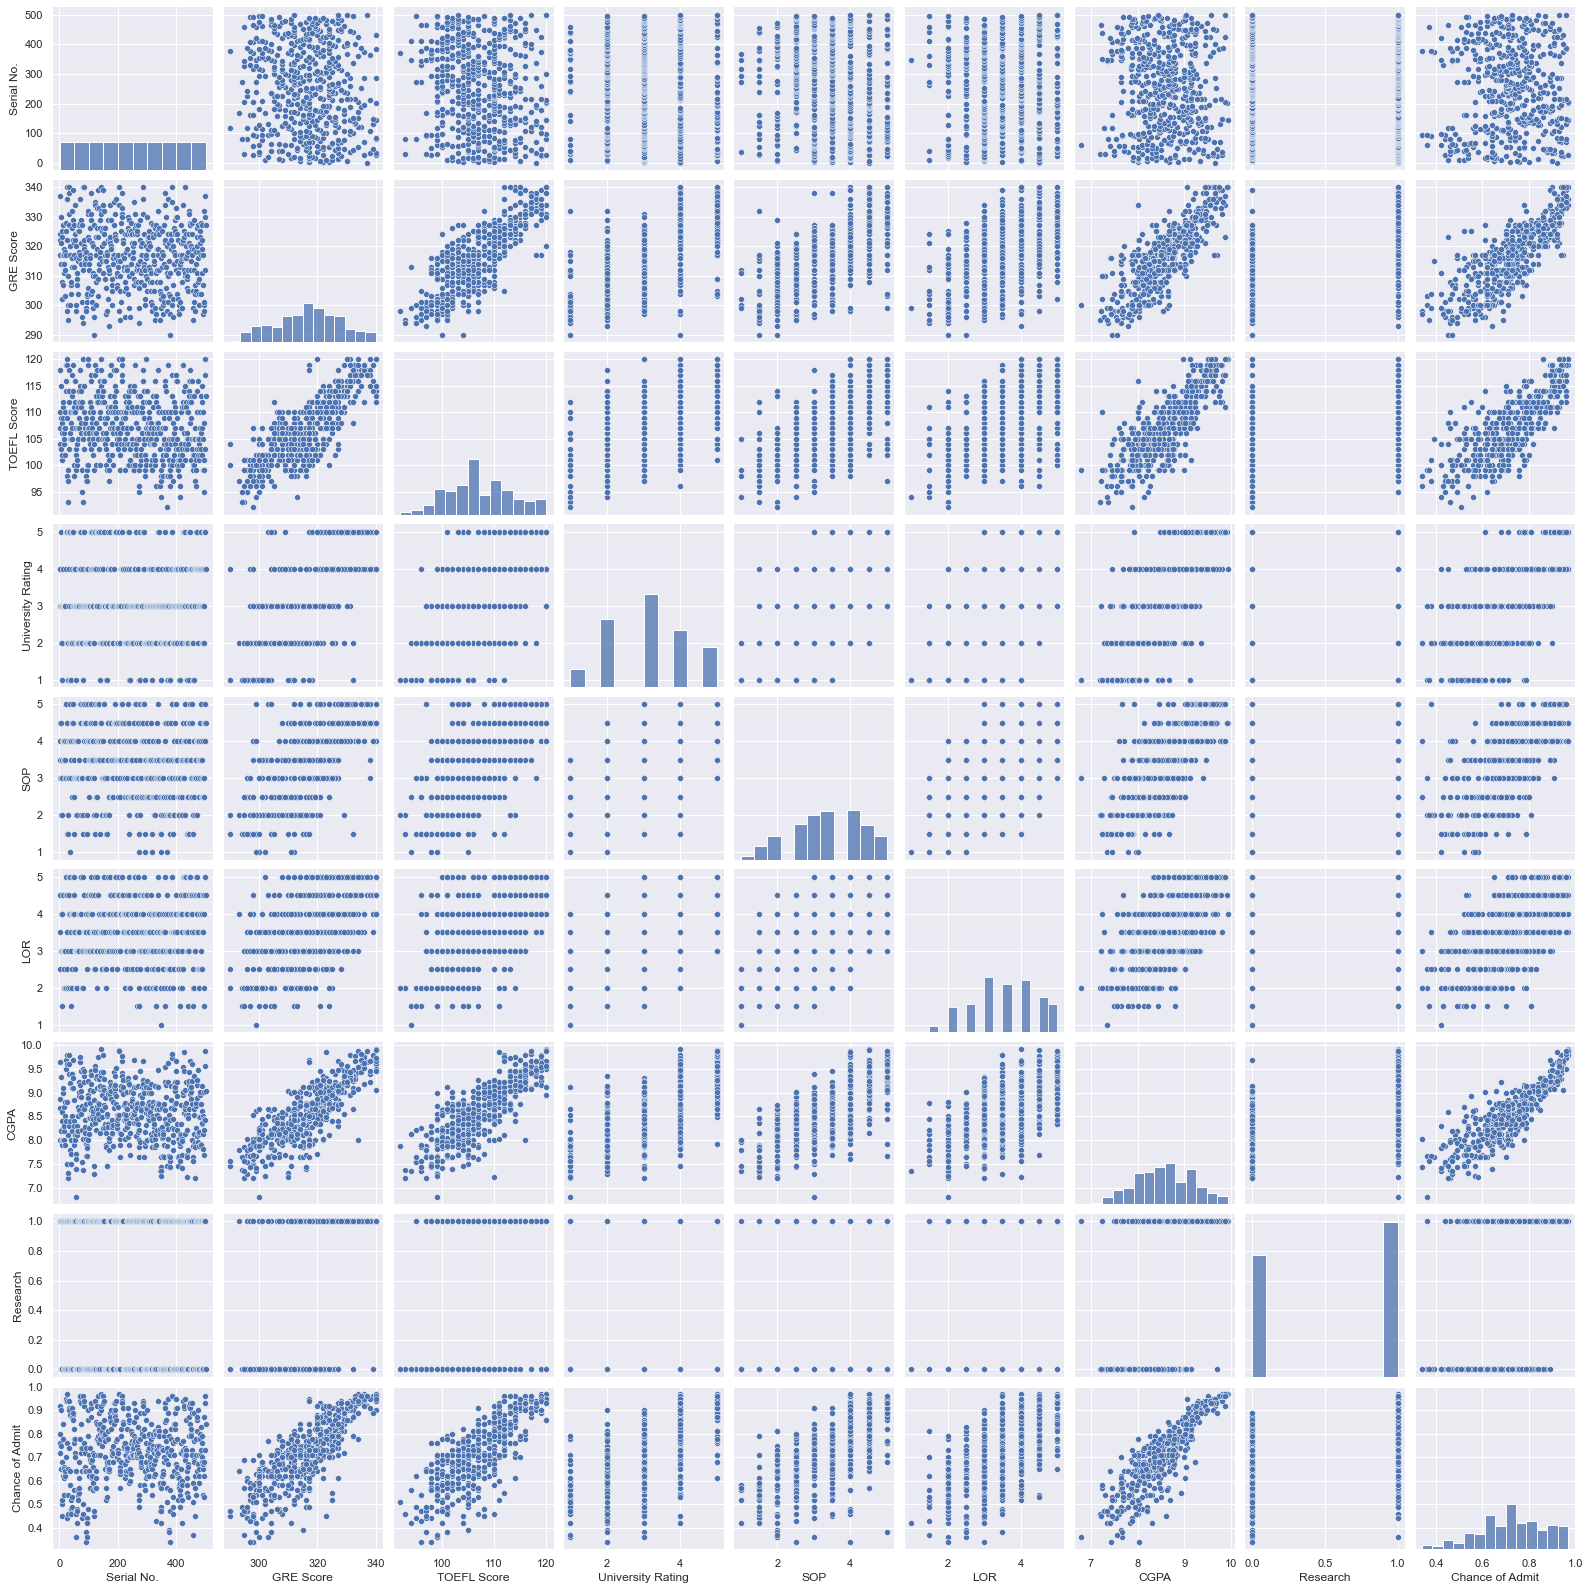

In [14]:
sns.pairplot(data)

<AxesSubplot:>

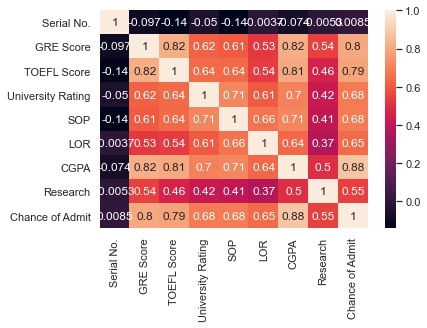

In [15]:
corr_mat=data.corr()
sns.heatmap(corr_mat,annot = True)

In [16]:
import scipy.stats as st
import pylab

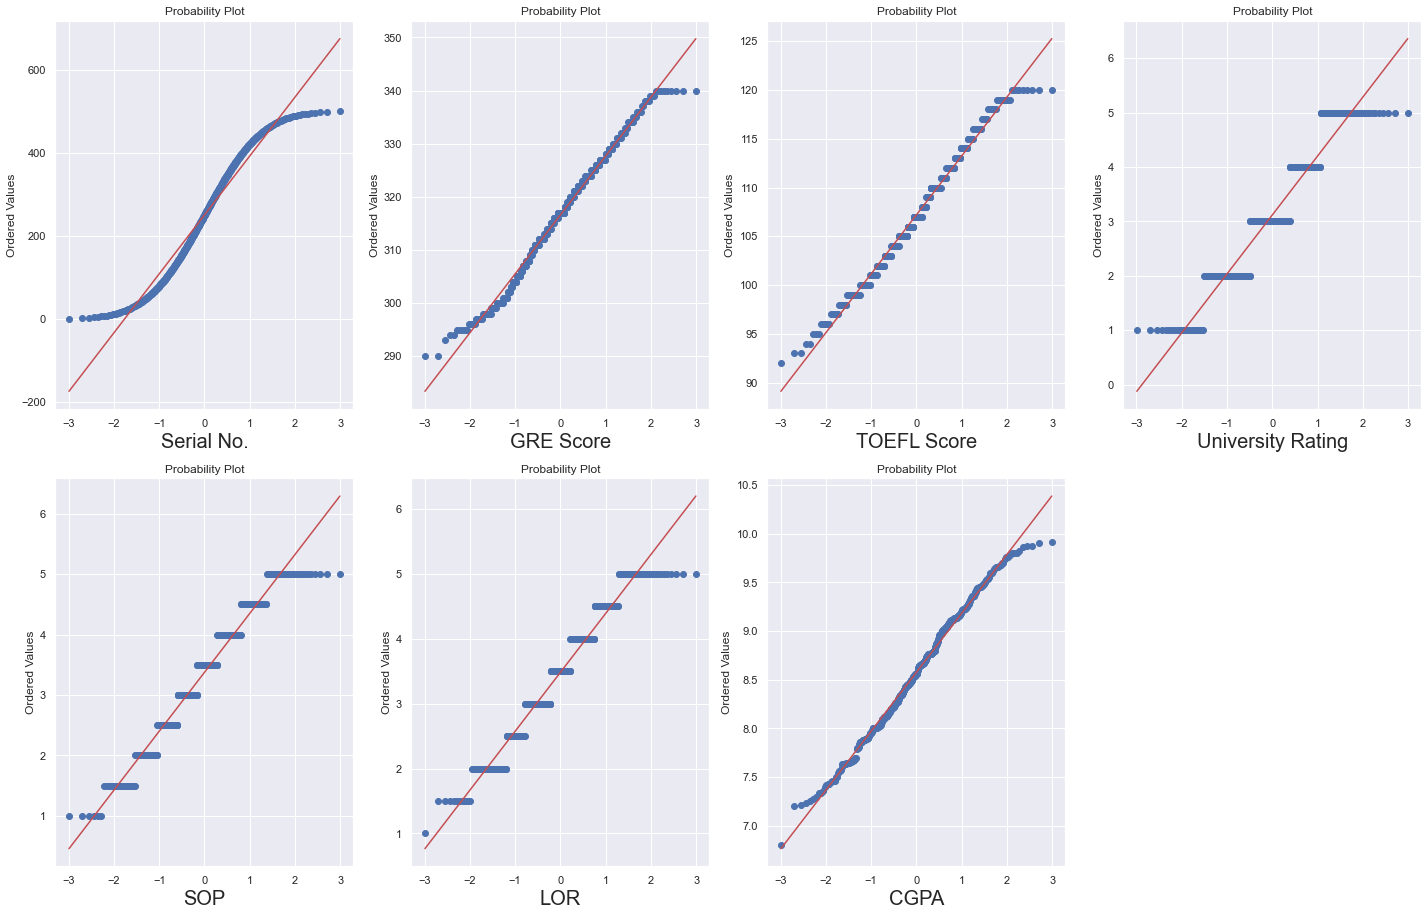

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(4,4,plotnumber)
        st.probplot(data[column],dist='norm',plot=pylab)
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

In [18]:
data.skew(axis=0)

Serial No.           0.000000
GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

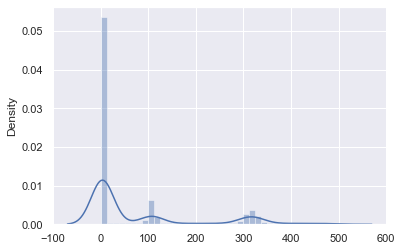

In [19]:
sns.distplot(data)

-0.11444197659043719

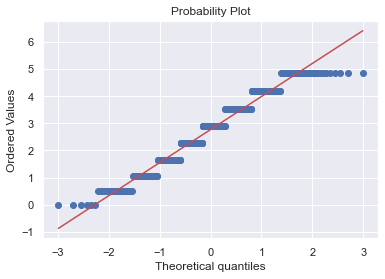

In [20]:
z=st.boxcox(data['SOP'])
z=z[0]
st.probplot(z,dist='norm',plot=pylab);
st.skew(z)

In [21]:
z=pd.Series(z)

In [22]:
data['Purpose']=pd.Series(z)

In [23]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Purpose
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92,4.197080
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76,3.537751
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72,2.267715
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80,2.894032
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65,1.077438
...,...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87,4.197080
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96,4.870595
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93,4.197080
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73,3.537751


In [24]:
data=data.drop(columns=['SOP'])

In [25]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,Purpose
0,1,337.0,118.0,4.0,4.5,9.65,1,0.92,4.197080
1,2,324.0,107.0,4.0,4.5,8.87,1,0.76,3.537751
2,3,317.0,104.0,3.0,3.5,8.00,1,0.72,2.267715
3,4,322.0,110.0,3.0,2.5,8.67,1,0.80,2.894032
4,5,314.0,103.0,2.0,3.0,8.21,0,0.65,1.077438
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.0,9.02,1,0.87,4.197080
496,497,337.0,117.0,5.0,5.0,9.87,1,0.96,4.870595
497,498,330.0,120.0,5.0,5.0,9.56,1,0.93,4.197080
498,499,312.0,103.0,4.0,5.0,8.43,0,0.73,3.537751


In [26]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR',
       'CGPA', 'Research', 'Chance of Admit', 'Purpose'],
      dtype='object')

In [27]:
data.drop(columns=['Serial No.'])

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,Purpose
0,337.0,118.0,4.0,4.5,9.65,1,0.92,4.197080
1,324.0,107.0,4.0,4.5,8.87,1,0.76,3.537751
2,317.0,104.0,3.0,3.5,8.00,1,0.72,2.267715
3,322.0,110.0,3.0,2.5,8.67,1,0.80,2.894032
4,314.0,103.0,2.0,3.0,8.21,0,0.65,1.077438
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.0,9.02,1,0.87,4.197080
496,337.0,117.0,5.0,5.0,9.87,1,0.96,4.870595
497,330.0,120.0,5.0,5.0,9.56,1,0.93,4.197080
498,312.0,103.0,4.0,5.0,8.43,0,0.73,3.537751


In [28]:
y=data['Chance of Admit']
X=data.drop(columns=['Chance of Admit'])

In [29]:
scaler= StandardScaler()

x_scaled = scaler.fit_transform(X)

In [30]:
x_scaled

array([[-1.72859016,  1.84150547,  1.78914648, ...,  1.77680627,
         0.88640526,  1.15504063],
       [-1.72166195,  0.66960557, -0.03043666, ...,  0.48585943,
         0.88640526,  0.62094343],
       [-1.71473373,  0.03858255, -0.52668661, ..., -0.95404281,
         0.88640526, -0.40786405],
       ...,
       [ 1.71473373,  1.21048245,  2.11997978, ...,  1.62785086,
         0.88640526,  1.15504063],
       [ 1.72166195, -0.41214818, -0.69210326, ..., -0.24236699,
        -1.12815215,  0.62094343],
       [ 1.72859016,  0.94004401,  0.96206323, ...,  0.76721964,
        -1.12815215,  1.15504063]])

In [31]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [32]:
print(x_train.shape,y_train.shape)

(375, 8) (375,)


In [33]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
reg.score(x_train,y_train)

0.8453334898349627

In [35]:
def adj_r2(x,y):
    r2=reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [36]:
reg.score(x_test,y_test)

0.768419196727752

In [37]:
adj_r2(x_test,y_test)

0.7524481068469073

In [38]:
y_pred=reg.predict(x_test)
y_pred

array([0.41005932, 0.85111645, 0.6447951 , 0.85477824, 0.9734081 ,
       0.68099375, 0.63617529, 0.51206197, 0.65851611, 0.44153039,
       0.82668119, 0.607433  , 0.7838954 , 0.69765414, 0.65936894,
       0.67755755, 0.76880778, 0.65899934, 0.58859905, 0.83790175,
       0.6721089 , 0.77637902, 0.81497727, 0.56128105, 0.57784948,
       0.68199974, 0.46864293, 0.7959884 , 0.79287329, 0.82512724,
       0.73755464, 0.98466466, 0.96299413, 0.70807282, 0.77979952,
       0.64209433, 0.85298195, 0.71590033, 0.67681774, 0.62809823,
       0.62729259, 0.63430745, 0.69326704, 0.62238213, 0.65594742,
       0.673221  , 0.57979076, 0.75296681, 0.7356235 , 0.61817579,
       0.67145252, 0.77713698, 0.64145233, 0.91434403, 0.6414029 ,
       0.79145187, 0.4899207 , 0.83806958, 0.76120049, 0.46414279,
       0.77642204, 0.56572221, 0.74537936, 0.64525586, 0.62868465,
       0.9556677 , 0.61302767, 0.67129772, 0.87490724, 0.61538626,
       0.94304351, 0.95278221, 0.81829264, 0.51733851, 0.61945

In [39]:
from sklearn.metrics import mean_squared_error as mse
z=mse(y_test,y_pred)
z

0.004604146506354731

In [40]:
s=np.sqrt(z)
s                 ##Root mean square

0.06785386139605269

In [41]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_pred)

0.04923654625080646

In [42]:
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual-y_predicted)/y_actual))*100
    return mape

In [43]:
a=MAPE(y_test,y_pred)
a

7.945108666032591

In [44]:
features_cols = ['CGPA']
x=data[features_cols]
y= data['Chance of Admit']


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)


print(lm.intercept_)
print(lm.coef_)

-1.0443349238990385
[0.20592168]


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=X.columns

In [48]:
vif

,VIF,features
0,1.055423,Serial No.
1,4.155888,GRE Score
2,3.838557,TOEFL Score
3,2.534191,University Rating
4,2.058941,LOR
5,4.667039,CGPA
6,1.463047,Research
7,2.865931,Purpose
